In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
## Nome dos paths onse estão salvos e vamos salvar os dados processados
PATH_FAIXA_ETARIAS = '../dados/faixa_etaria/' # Nome do path dos arquivos salvos
PATH_DADOS_PROCESSADOS = '../dados/e_sus_processados/' # Nome do path a salvar os arquivos
PATH_MUNICIPIOS = '../dados/processados/'
PATH_ESTADO = '../dados/municipios/'
PATH_FIGURAS = '../figure/'

FILES_ESTADOS = os.listdir(PATH_DADOS_PROCESSADOS)
FILENAME_FAIXA_ETARIAS = 'faixa_etaria_processada.csv'
FILENAME_MUNICIPIOS = 'municipios_processada.csv'
FILENAME_ESTADO = 'estados_processada.csv'

dfMunicipios_d = pd.read_csv(PATH_MUNICIPIOS + FILENAME_MUNICIPIOS, encoding='utf-8', delimiter=';')
dfFE = pd.read_csv(PATH_FAIXA_ETARIAS + FILENAME_FAIXA_ETARIAS, encoding='utf-8', delimiter=';')
dfEstado_d = pd.read_csv(PATH_ESTADO + FILENAME_ESTADO, encoding='utf-8', delimiter=';')

cols = ['dataNotificacao', 'sexo', 'idade', 'estado_normalizado', 'municipio_normalizado', 'extractDate', 'idadeTrunc']

dflist = []

for file in FILES_ESTADOS:
    dfLoad = pd.read_csv(PATH_DADOS_PROCESSADOS + file, encoding='utf-8', delimiter=';', compression='zip')
    dfLoad = dfLoad[[c for c in dfLoad.columns if c in cols]]
    dflist.append(dfLoad.copy())
    
    print(f'Lido csv {file}')

dfProc = pd.concat(dflist).dropna(how='any',axis=0)

Lido csv rr_sus_processados.csv
Lido csv ba_sus_processados.csv
Lido csv es_sus_processados.csv
Lido csv df_sus_processados.csv
Lido csv rj_sus_processados.csv
Lido csv ma_sus_processados.csv
Lido csv mg_sus_processados.csv
Lido csv sc_sus_processados.csv
Lido csv pe_sus_processados.csv
Lido csv ro_sus_processados.csv
Lido csv pi_sus_processados.csv
Lido csv se_sus_processados.csv
Lido csv go_sus_processados.csv
Lido csv rn_sus_processados.csv
Lido csv pr_sus_processados.csv
Lido csv pa_sus_processados.csv
Lido csv am_sus_processados.csv
Lido csv pb_sus_processados.csv
Lido csv al_sus_processados.csv
Lido csv ac_sus_processados.csv
Lido csv mt_sus_processados.csv
Lido csv ce_sus_processados.csv
Lido csv to_sus_processados.csv
Lido csv sp_sus_processados.csv
Lido csv rs_sus_processados.csv


In [3]:
dfProc.count()

dataNotificacao          5540139
sexo                     5540139
idade                    5540139
estado_normalizado       5540139
municipio_normalizado    5540139
extractDate              5540139
idadeTrunc               5540139
dtype: int64

A base com a populacao dividida em faixa etária é tratada para que numa mesma coluna fiquem o população total, segmentada pelo estado e pela faixa etária a qual pertencem

In [4]:
###################
# dfEstado
###################

cols_sel = ['uf', 
            'estado_normalizado']
dfEstado = dfEstado_d.reset_index()
dfEstado = dfEstado[cols_sel].set_index('uf')
dfEstado

,estado_normalizado
uf,
RO,rondonia
AC,acre
AM,amazonas
RR,roraima
PA,para
AP,amapa
TO,tocantins
MA,maranhao
PI,piaui


In [5]:
###################
# df dos Municipios
###################

cols_sel = ['codigo_ibge', 
            'municipioNormalizado', 
            'codigo_uf', 
            'uf', 
            'estado', 
            'densidade_populacional', 
            'area_mun', 
            'populacao_estimada']
dfMunicipios = dfMunicipios_d[cols_sel].set_index('uf')

In [6]:
###################
# Cruzamento dos municipios com dfEstado para trazer densidade populacional por estado
###################
dfEstado = (dfMunicipios.join(dfEstado, on = ['uf'])
            .rename(columns= {'municipioNormalizado' : 'municipio_normalizado'})
            .reset_index().set_index(['estado_normalizado', 'municipio_normalizado'])
           )

In [7]:
dfEstadoCopy = dfEstado.copy()
dfEstado

,,uf,codigo_ibge,codigo_uf,estado,densidade_populacional,area_mun,populacao_estimada
estado_normalizado,municipio_normalizado,,,,,,,
goias,abadia de goias,GO,5200050,52,Goiás,60.832835,147.256,8958
minas gerais,abadia dos dourados,MG,3100104,31,Minas Gerais,7.951749,881.064,7006
goias,abadiania,GO,5200100,52,Goiás,19.577525,1045.127,20461
minas gerais,abaete,MG,3100203,31,Minas Gerais,12.795345,1817.067,23250
para,abaetetuba,PA,1500107,15,Pará,98.767456,1610.652,159080
...,...,...,...,...,...,...,...,...
bahia,xique-xique,BA,2933604,29,Bahia,9.158680,5079.662,46523
paraiba,zabele,PB,2517407,25,Paraíba,21.112058,106.811,2255
sao paulo,zacarias,SP,3557154,35,São Paulo,8.625445,319.056,2752


In [8]:
###################
# calcular com a densidade populacional por estado
###################

dfDensEstado = dfEstado[['area_mun', 'populacao_estimada', 'densidade_populacional']]
# dfDensEstado = dfDensEstado.loc[dfDensEstado['densidade_populacional'] > 500]
dfDensEstado

,,area_mun,populacao_estimada,densidade_populacional
estado_normalizado,municipio_normalizado,,,
goias,abadia de goias,147.256,8958,60.832835
minas gerais,abadia dos dourados,881.064,7006,7.951749
goias,abadiania,1045.127,20461,19.577525
minas gerais,abaete,1817.067,23250,12.795345
para,abaetetuba,1610.652,159080,98.767456
...,...,...,...,...
bahia,xique-xique,5079.662,46523,9.158680
paraiba,zabele,106.811,2255,21.112058
sao paulo,zacarias,319.056,2752,8.625445


In [9]:
###################
# Tratamento do df com os casos de Covid
###################

dfIdadeEstado = (dfProc[['extractDate', 'estado_normalizado', 'municipio_normalizado']].copy()
                 .reset_index(drop=True)
                 .set_index('estado_normalizado', 'municipio_normalizado'))

# dfIdadeEstado['dateTruncate'] = pd.to_datetime(dfIdadeEstado['extractDate']).dt.to_period('M') 

### Cruzamento dos dados com informações dos estados

O intuito desse cruzamento e a homogenização dos dados com a informação geográfica e nomeclatura dos estados. 

In [10]:
################################
# Agrupamento por Idade e Estado
################################
dfGroupIdEst = (dfIdadeEstado
         .groupby(['estado_normalizado', 'municipio_normalizado']).size()
         .reset_index(name='soma_casos_covid')
         .rename(columns={'extractDate': 'soma_casos_covid'})
         .set_index(['estado_normalizado', 'municipio_normalizado'])
        )

################################
# Restringindo valores
################################
dfGroupIdEstCom = dfGroupIdEst.copy()

################################
# normalizando
################################

def normalizar_column(df, dfDenEst):
    fact_norm = 1000
    col_norm = f'norm_x{fact_norm}Hab'
    df = df.merge(dfDenEst, on = ['estado_normalizado', 'municipio_normalizado'])
    df['norm'] = df['soma_casos_covid'].div(df['populacao_estimada'])
    df[col_norm] = df['soma_casos_covid'].div(df['populacao_estimada'])*fact_norm
    df = df.dropna(how='any',axis=0)
    return (df, col_norm)

dfFinalIdEstCom, col_norm = normalizar_column(dfGroupIdEstCom, dfDensEstado)
dfFinalIdEst, col_norm = normalizar_column(dfGroupIdEst, dfDensEstado)

dfFinalIdEst = dfFinalIdEst.loc[dfFinalIdEst['soma_casos_covid'] > 1000]
dfFinalIdEst = dfFinalIdEst.loc[dfFinalIdEst['populacao_estimada'] > 100000]
dfFinalIdEst = dfFinalIdEst.loc[dfFinalIdEst['densidade_populacional'] > 10]


In [11]:
dfFinalIdEst.columns

Index(['soma_casos_covid', 'area_mun', 'populacao_estimada',
       'densidade_populacional', 'norm', 'norm_x1000Hab'],
      dtype='object')

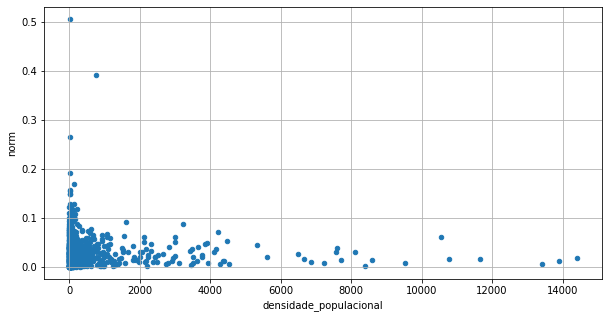

In [12]:
################################
# Plot do df Completo
################################

x_column = 'densidade_populacional'
# y_column = col_norm
y_column = 'norm'
dfFinalIdEstCom.sort_values(x_column).plot(kind = 'scatter', x = x_column, y=y_column, figsize=(10,5))
plt.grid()
plt.savefig(f'{PATH_FIGURAS}densidade_populacional_completo.png', bbox_inches = 'tight', pad_inches = 0)

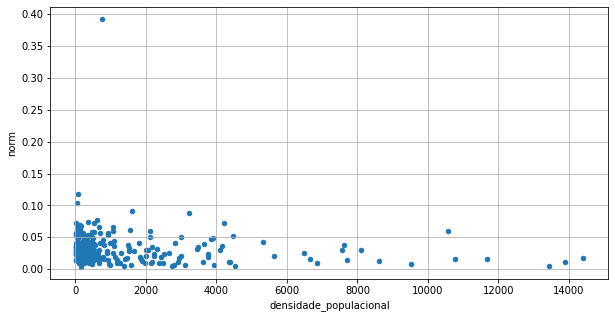

In [13]:
################################
# Plot do df com restrições
################################
x_column = 'densidade_populacional'
# y_column = col_norm
y_column = 'norm'
dfFinalIdEst.sort_values(x_column).plot(kind = 'scatter', x = x_column, y=y_column, figsize=(10,5))
plt.grid()

In [14]:
## Normalizando a densidade com uma distribuição normal
dfFinalIdEst['dens_dist_normal'] = (dfFinalIdEst['densidade_populacional']-dfFinalIdEst['densidade_populacional'].mean())/dfFinalIdEst['densidade_populacional'].std()
dfFinalIdEst['popu_dist_normal'] = (dfFinalIdEst['populacao_estimada']-dfFinalIdEst['populacao_estimada'].mean())/dfFinalIdEst['populacao_estimada'].std()
dfFinalIdEst.count()

soma_casos_covid          273
area_mun                  273
populacao_estimada        273
densidade_populacional    273
norm                      273
norm_x1000Hab             273
dens_dist_normal          273
popu_dist_normal          273
dtype: int64

In [15]:
dfFinalIdEstOutlier = dfFinalIdEst[(np.abs(stats.zscore(dfFinalIdEst[['norm']])) < 3).all(axis=1)]
dfFinalIdEstOutlier

soma_casos_covid   area_mun  \
estado_normalizado municipio_normalizado                                   
acre               rio branco                           10982   8834.942   
alagoas            arapiraca                            15234    345.655   
                   maceio                               31211    509.320   
amazonas           itacoatiara                           2429   8891.906   
                   manaus                               60713  11401.092   
...                                                       ...        ...   
sergipe            aracaju                              26139    182.163   
                   lagarto                               2459    968.921   
                   nossa senhora do socorro              2088    155.018   
tocantins          araguaina                            18978   4004.646   
                   palmas                                4826   2227.444   

                                             populacao_estimada  \
estado_normalizado municipio_normalizado                          
acre               rio branco                            413418   
alagoas            arapiraca                             233047   
                   maceio                               1025360   
amazonas           itacoatiara                           102701   
                   manaus                               2219580   
...                                                         ...   
sergipe            aracaju                               664908   
                   lagarto                               105221   
                   nossa senhora do socorro              185706   
tocantins          araguaina                             183381   
                   palmas                                306296   

                                             densidade_populacional      norm  \
estado_normalizado municipio_normalizado                                        
acre               rio branco                             46.793516  0.026564   
alagoas            arapiraca                             674.218513  0.065369   
                   maceio                               2013.194063  0.030439   
amazonas           itacoatiara                            11.549942  0.023651   
                   manaus                                194.681352  0.027353   
...                                                             ...       ...   
sergipe            aracaju                              3650.071639  0.039312   
                   lagarto                               108.596057  0.023370   
                   nossa senhora do socorro             1197.964107  0.011244   
tocantins          araguaina                              45.792063  0.103489   
                   palmas                                137.510079  0.015756   

                                             norm_x1000Hab  dens_dist_normal  \
estado_normalizado municipio_normalizado                                       
acre               rio branco                    26.563914         -0.559007   
alagoas            arapiraca                     65.368788         -0.294290   
                   maceio                        30.439065          0.270638   
amazonas           itacoatiara                   23.651182         -0.573877   
                   manaus                        27.353373         -0.496612   
...                                                    ...               ...   
sergipe            aracaju                       39.312206          0.961254   
                   lagarto                       23.369860         -0.532932   
                   nossa senhora do socorro      11.243579         -0.073316   
tocantins          araguaina                    103.489456         -0.559430   
                   palmas                        15.756001         -0.520733   

                                             popu_dist_normal  
estado_normalizado munici

[[ 0.70968265  0.02700112]
 [ 3.46678346  0.02055791]
 [-0.40989553  0.03118318]]


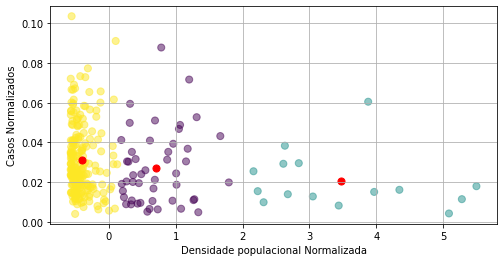

In [35]:
dfKmeans = dfFinalIdEstOutlier[['dens_dist_normal', 'norm']]
  
kmeans = KMeans(n_clusters=3).fit(dfKmeans)
centroids = kmeans.cluster_centers_
print(centroids)

# fig = plt.figure()
# ax = Axes3D(fig)

# ax.scatter(dfKmeans['dens_dist_normal'], dfKmeans['norm'], dfKmeans['popu_dist_normal'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
# ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
# ax.set_zlim([0, 10])
plt.figure(figsize=(8,4))
plt.scatter(dfKmeans['dens_dist_normal'], dfKmeans['norm'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.ylabel("Casos Normalizados")
plt.xlabel("Densidade populacional Normalizada")
plt.grid()
plt.savefig(f'{PATH_FIGURAS}Kmeans.png', bbox_inches = 'tight', pad_inches = 0)

In [41]:
dfFinalIdEstOutlier = dfFinalIdEstOutlier.reset_index()
dfFinalIdEstOutlier['kmeans_cluster'] = pd.Series(kmeans.labels_.astype(float))
dfFinalIdEstOutlier = dfFinalIdEstOutlier.set_index(['estado_normalizado', 'municipio_normalizado'])
dfFinalIdEstOutlier

soma_casos_covid   area_mun  \
estado_normalizado municipio_normalizado                                   
acre               rio branco                           10982   8834.942   
alagoas            arapiraca                            15234    345.655   
                   maceio                               31211    509.320   
amazonas           itacoatiara                           2429   8891.906   
                   manaus                               60713  11401.092   
...                                                       ...        ...   
sergipe            aracaju                              26139    182.163   
                   lagarto                               2459    968.921   
                   nossa senhora do socorro              2088    155.018   
tocantins          araguaina                            18978   4004.646   
                   palmas                                4826   2227.444   

                                             populacao_estimada  \
estado_normalizado municipio_normalizado                          
acre               rio branco                            413418   
alagoas            arapiraca                             233047   
                   maceio                               1025360   
amazonas           itacoatiara                           102701   
                   manaus                               2219580   
...                                                         ...   
sergipe            aracaju                               664908   
                   lagarto                               105221   
                   nossa senhora do socorro              185706   
tocantins          araguaina                             183381   
                   palmas                                306296   

                                             densidade_populacional      norm  \
estado_normalizado municipio_normalizado                                        
acre               rio branco                             46.793516  0.026564   
alagoas            arapiraca                             674.218513  0.065369   
                   maceio                               2013.194063  0.030439   
amazonas           itacoatiara                            11.549942  0.023651   
                   manaus                                194.681352  0.027353   
...                                                             ...       ...   
sergipe            aracaju                              3650.071639  0.039312   
                   lagarto                               108.596057  0.023370   
                   nossa senhora do socorro             1197.964107  0.011244   
tocantins          araguaina                              45.792063  0.103489   
                   palmas                                137.510079  0.015756   

                                             norm_x1000Hab  dens_dist_normal  \
estado_normalizado municipio_normalizado                                       
acre               rio branco                    26.563914         -0.559007   
alagoas            arapiraca                     65.368788         -0.294290   
                   maceio                        30.439065          0.270638   
amazonas           itacoatiara                   23.651182         -0.573877   
                   manaus                        27.353373         -0.496612   
...                                                    ...               ...   
sergipe            aracaju                       39.312206          0.961254   
                   lagarto                       23.369860         -0.532932   
                   nossa senhora do socorro      11.243579         -0.073316   
tocantins          araguaina                    103.489456         -0.559430   
                   palmas                        15.756001         -0.520733   

                                             popu_dist_normal  kmeans_cluster  
estado_no

### Para o Cluster 0

In [49]:
def plot_corr(df):
    corr = df[['soma_casos_covid', 'area_mun', 'norm', 'populacao_estimada', 'densidade_populacional', 'dens_dist_normal']].corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values, 
                yticklabels=corr.columns.values, 
                cmap = 'RdYlGn_r', 
                annot=True)
    return corr

def plot_regression(df, eixoX, eixoY, name_grafico):
    y = df[eixoY]
    x = df[eixoX]
    a, b, r, p, std_err = stats.linregress(x, y)
    dfResult = df.copy()
    dfResult['y_estimated'] = df[eixoX].apply(lambda x: a * x + b)
    print(f"Coeficiente de correlação : {r**2}")
    
    plt.figure(figsize=(8,4))
    plt.plot(dfResult[eixoX], dfResult['y_estimated'], 'g-')
    plt.scatter(dfResult[eixoX], dfResult[eixoY])
    plt.ylabel("Casos Normalizados")
    plt.xlabel("Densidade populacional")
    plt.grid()
    plt.savefig(f'{PATH_FIGURAS}{name_grafico}.png', bbox_inches = 'tight', pad_inches = 0)

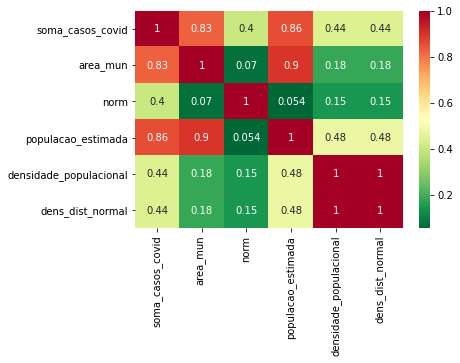

In [42]:
dfCluster0 = dfFinalIdEstOutlier.loc[dfFinalIdEstOutlier['kmeans_cluster'] == 0]
corr0 = plot_corr(dfCluster0)

In [43]:
dfCluster0.size / dfFinalIdEstOutlier.size

0.17712177121771217

Coeficiente de correlação : 0.021702067075386473


Text(0.5, 15.0, 'Densidade populacional')

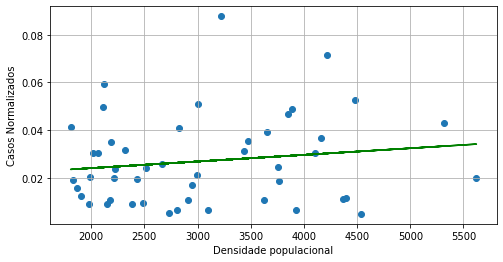

In [50]:
plot_regression(dfCluster0, 'densidade_populacional', 'norm', 'regression_cluster0')
plt.ylabel("Casos Normalizados")
plt.xlabel("Densidade populacional")

### Para o cluster 1

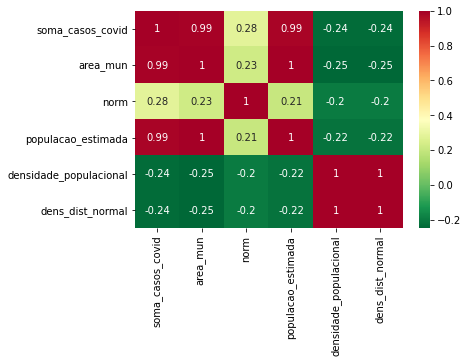

In [45]:
dfCluster1 = dfFinalIdEstOutlier.loc[dfFinalIdEstOutlier['kmeans_cluster'] == 1]
corr1 = plot_corr(dfCluster1)

In [26]:
dfCluster1.size / dfFinalIdEstOutlier.size

0.055350553505535055

Coeficiente de correlação : 0.038531904602388437


Text(0.5, 15.0, 'Densidade populacional')

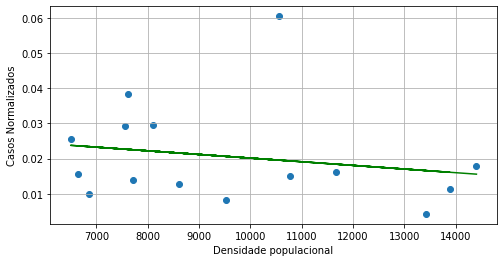

In [51]:
plot_regression(dfCluster1, 'densidade_populacional', 'norm', 'regression_cluster1')
plt.ylabel("Casos Normalizados")
plt.xlabel("Densidade populacional")

### Para o cluster 2

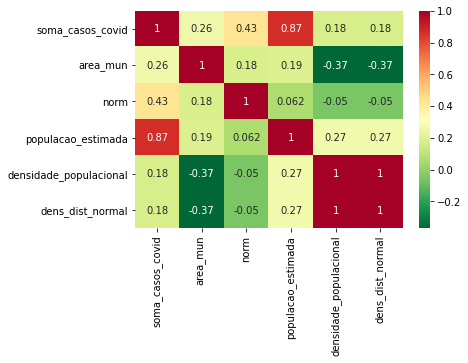

In [47]:
dfCluster2 = dfFinalIdEstOutlier.loc[dfFinalIdEstOutlier['kmeans_cluster'] == 2]
corr2 = plot_corr(dfCluster2)

Coeficiente de correlação : 0.00254542436823241


Text(0.5, 15.0, 'Densidade populacional')

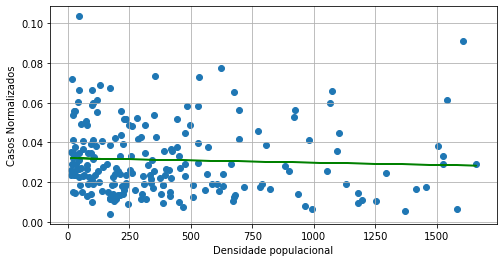

In [52]:
plot_regression(dfCluster2, 'densidade_populacional', 'norm', 'regression_cluster2')
plt.ylabel("Casos Normalizados")
plt.xlabel("Densidade populacional")

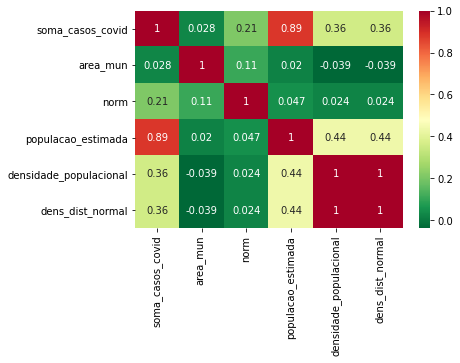

In [79]:
## Correlação Matriz Completa
dfFinalIdEstCom['dens_dist_normal'] = (dfFinalIdEstCom['densidade_populacional']-dfFinalIdEstCom['densidade_populacional'].mean())/dfFinalIdEstCom['densidade_populacional'].std()
corrCom = plot_corr(dfFinalIdEstCom)

In [80]:
corrCom['Fonte'] =  'Completo'
corr0['Fonte'] =  'Cluster 0'
corr1['Fonte'] =  'Cluster 1'
corr2['Fonte'] =  'Cluster 2'

dfCorrFinal = pd.concat([corrCom, corr0, corr1, corr2]).reset_index()
dfCorrFinal.loc[dfCorrFinal['index'] == 'norm'].set_index('Fonte').drop('index', axis=1)

,soma_casos_covid,area_mun,norm,populacao_estimada,densidade_populacional,dens_dist_normal
Fonte,,,,,,
Completo,0.211333,0.108522,1.0,0.046624,0.024115,0.024115
Cluster 0,0.402471,0.070433,1.0,0.053584,0.147316,0.147316
Cluster 1,0.284061,0.225436,1.0,0.209310,-0.196295,-0.196295
Cluster 2,0.432073,0.176880,1.0,0.062075,-0.050452,-0.050452


In [81]:
corrCom['Fonte'] =  'Completo'
corr0['Fonte'] =  'Cluster 0'
corr1['Fonte'] =  'Cluster 1'
corr2['Fonte'] =  'Cluster 2'

dfCorrFinal = pd.concat([corrCom, corr0, corr1, corr2]).reset_index()
dfCorrFinal.loc[dfCorrFinal['index'] == 'soma_casos_covid'].set_index('Fonte').drop('index', axis=1)

,soma_casos_covid,area_mun,norm,populacao_estimada,densidade_populacional,dens_dist_normal
Fonte,,,,,,
Completo,1.0,0.028150,0.211333,0.886327,0.358990,0.358990
Cluster 0,1.0,0.828956,0.402471,0.856655,0.444031,0.444031
Cluster 1,1.0,0.991900,0.284061,0.989240,-0.237091,-0.237091
Cluster 2,1.0,0.257393,0.432073,0.870706,0.176186,0.176186
